# Simple Linear Regression (Gapminder Project)

In this project you are going to work with __gapminder__ dataset, which tracks economic and social indicators like population, life expectancy and the GDP per capita of countries over time. For more information about Gapminder, visit the this [link](https://www.gapminder.org/data/)

This is a guided project, which I will guide you through to proceed with this small project. I believe this method will prepare you for your own future projects.

In order to do this project, you may need to refer to this [tutorial](https://github.com/DrSaadLa/PythonTuts/blob/main/ML%20with%20Python/02.01.%20Linear%20Regression%20with%20Python%20(Part%2001)%20Solution.ipynb)

### Import Necessary Modules
1. import pandas
2. import numpy 
3. import seaborn
4. import matplotlib.pyplot

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import the dataset

the dataset can be downloaded from [here](https://raw.githubusercontent.com/DrSaadLa/PythonTuts/main/Data/gapminder.csv). 


In [81]:
# Here is the url provided for you
url = "https://raw.githubusercontent.com/DrSaadLa/PythonTuts/main/Data/gapminder.csv"

In [82]:
# use pd.read_csv() to import the data
data=pd.read_csv(url)

In [83]:
# Check the first few obs
data.head(10)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.10,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.00,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.50,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.10,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.10,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific
5,8331465.0,1.41,0.30,8.183160,26.46741,43952.0,124.1394,80.4,4.6,Europe & Central Asia
6,8868713.0,1.99,0.10,5.109538,25.65117,14365.0,128.6024,70.6,43.3,Europe & Central Asia
7,348587.0,1.89,3.10,3.131921,27.24594,24373.0,124.3862,72.2,14.5,America
8,148252473.0,2.38,0.06,0.319161,20.39742,2265.0,125.0307,68.4,55.9,South Asia
9,277315.0,1.83,1.30,6.008279,26.38439,16075.0,126.3940,75.3,15.4,America


In [84]:
# Check the last few obs
data.tail(10)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
129,70344357.0,2.15,0.06,4.021903,26.70371,16454.0,124.0675,75.1,22.2,Europe & Central Asia
130,31014427.0,6.34,6.40,0.100853,22.35833,1437.0,134.5204,57.2,89.3,Sub-Saharan Africa
131,46028476.0,1.38,1.10,7.032359,25.42379,8762.0,131.4962,68.2,12.9,Europe & Central Asia
132,61689620.0,1.87,0.20,8.526467,27.39249,37739.0,124.0845,79.5,5.6,Europe & Central Asia
133,304473143.0,2.07,0.60,18.545992,28.45698,50384.0,118.4777,78.2,7.7,America
134,3350832.0,2.11,0.50,2.489764,26.39123,15317.0,124.2604,76.0,13.0,America
135,26952719.0,2.46,0.10,4.476669,25.32054,3733.0,124.3462,68.7,49.2,Europe & Central Asia
136,86589342.0,1.86,0.40,1.479347,20.91630,4085.0,121.9367,75.4,26.2,East Asia & Pacific
137,13114579.0,5.88,13.60,0.148982,20.68321,3039.0,132.4493,52.0,94.9,Sub-Saharan Africa
138,13495462.0,3.85,15.10,0.654323,22.02660,1286.0,131.9745,49.0,98.3,Sub-Saharan Africa


In [85]:
# check the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [87]:
# Run desriptive statistics
data.describe()
data.describe().T

,count,mean,std,min,25%,50%,75%,max
population,139.0,3.549977e+07,1.095121e+08,277315.000000,3.752776e+06,9.705130e+06,2.791973e+07,1.197070e+09
fertility,139.0,3.005108e+00,1.615354e+00,1.280000,1.810000e+00,2.410000e+00,4.095000e+00,7.590000e+00
HIV,139.0,1.915612e+00,4.408974e+00,0.060000,1.000000e-01,4.000000e-01,1.300000e+00,2.590000e+01
CO2,139.0,4.459874e+00,6.268349e+00,0.008618,4.961900e-01,2.223796e+00,6.589156e+00,4.870206e+01
BMI_male,139.0,2.462305e+01,2.209368e+00,20.397420,2.244814e+01,2.515699e+01,2.649757e+01,2.845698e+01
GDP,139.0,1.663878e+04,1.920730e+04,588.000000,2.899000e+03,9.938000e+03,2.327850e+04,1.260760e+05
BMI_female,139.0,1.267019e+02,4.471997e+00,117.375500,1.232322e+02,1.265196e+02,1.302759e+02,1.354920e+02
life,139.0,6.960288e+01,9.122189e+00,45.200000,6.220000e+01,7.200000e+01,7.685000e+01,8.260000e+01
child_mortality,139.0,4.509712e+01,4.572467e+01,2.700000,8.100000e+00,2.400000e+01,7.420000e+01,1.920000e+02


## Select Target and Feature Variable

This is a simple linear regression, so we are going to use only two variables. Suppose you wish to predict life expectancy in a given country using one variable such as GDP, fertility rate, or population. 

Before selecting the condidate input variable, we will plot a heatmap on the correlation matrix of dataset, then we select to highly correlated variable with the target, which will be __life__

### This section is done for you. 

<AxesSubplot:>

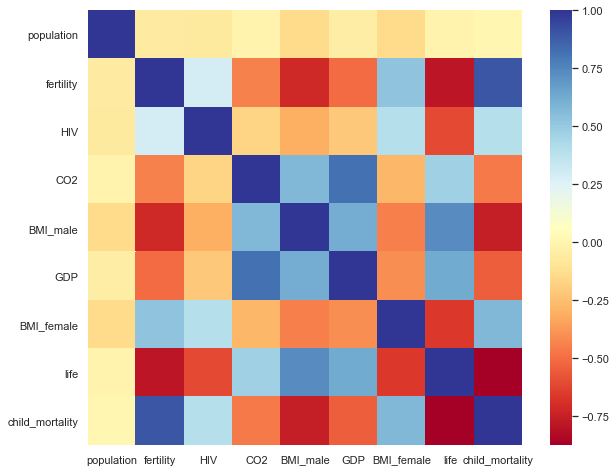

In [88]:
# Setting the figure size 
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data.corr(), cmap='RdYlBu', square=True)

From the headmap, the highly negatively correlated variable is __fertility__, which the one you are going to use to build your model. So:

Target is: __life__

Input is: __fertility__

In [90]:
# Rename life as y
data.rename(columns={"life":"y"})

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,y,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,76.0,13.0,America
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,68.7,49.2,Europe & Central Asia
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,75.4,26.2,East Asia & Pacific
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,52.0,94.9,Sub-Saharan Africa


In [91]:
# Rename the input variable as X
df=data.rename(columns={"fertility":"x", "life":"y"})
print(df)

     population     x   HIV        CO2  BMI_male      GDP  BMI_female     y  \
0    34811059.0  2.73   0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1    19842251.0  6.43   2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2    40381860.0  2.24   0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3     2975029.0  1.40   0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4    21370348.0  1.96   0.1  18.016313  27.56373  41312.0    117.3755  81.5   
..          ...   ...   ...        ...       ...      ...         ...   ...   
134   3350832.0  2.11   0.5   2.489764  26.39123  15317.0    124.2604  76.0   
135  26952719.0  2.46   0.1   4.476669  25.32054   3733.0    124.3462  68.7   
136  86589342.0  1.86   0.4   1.479347  20.91630   4085.0    121.9367  75.4   
137  13114579.0  5.88  13.6   0.148982  20.68321   3039.0    132.4493  52.0   
138  13495462.0  3.85  15.1   0.654323  22.02660   1286.0    131.9745  49.0   

     child_mortality                      Region  


In [92]:
# Check the shape of y
print("The shape of the target variable is :", df["y"].shape)






The shape of the target variable is : (139,)


In [93]:
# Check the shape of X
print("The shape of the input variable is :" , df["x"].shape)

The shape of the input variable is : (139,)


As we have seen in the lecture, we have to reshape a 1D array into a 2D array using reshape() function 

In [94]:
# reshape the target variable y
y_reshaped=np.array(df["y"]).reshape(-1,1)


In [95]:
# reshape the input variable X
x_reshaped=np.array(df["x"]).reshape(-1,1)


In [96]:
# print the new shape y
y_reshaped.shape

(139, 1)

In [97]:
# print the new shape of X
x_reshaped.shape

(139, 1)

### Plotting

Plot a scatter plot of the variables life and fertility.

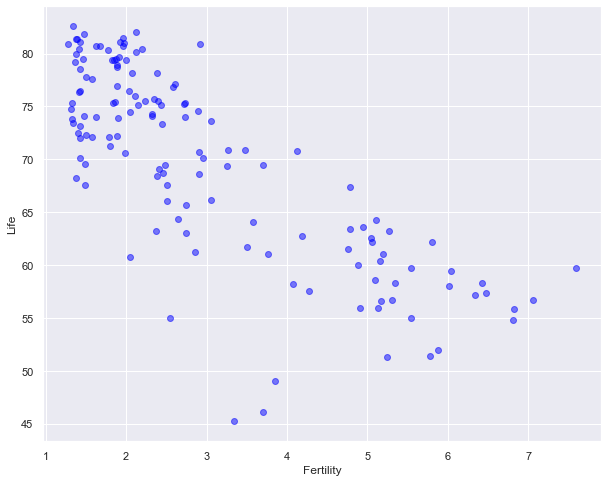

In [98]:
# plot scatter plot 
plt.scatter(x_reshaped,y_reshaped, color="blue", alpha=0.5)
plt.xlabel("Fertility")
plt.ylabel("Life")
plt.show()

Ovely a fitted line on the plot using `lmplot` from seaborn package. 

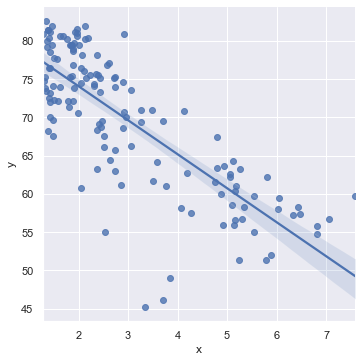

In [99]:
# plot linear regression plot.
sns.lmplot(x="x", y="y", data=df)

### Building a  Linear Regression Model

1. Import LinearRegression from sklearn
2. Create an lm object
3. Fit the model
4. Print the model parameters
5. Print the score of the model
6. predict on the same data

In [100]:
# Import LinearRegression() from sklearn.linear_model
from sklearn import linear_model

In [101]:
# Create lm object
simple_reg=linear_model.LinearRegression()
type(simple_reg)

sklearn.linear_model._base.LinearRegression

In [102]:
# fit the linear model
simple_reg.fit(y_reshaped,x_reshaped)

LinearRegression()

In [103]:
# Print the intercept 
print("The model intercept is: ", simple_reg.intercept_)

The model intercept is:  [12.70410728]


In [104]:
# Print the coef 
print("The model parameter is: ", simple_reg.coef_)

The model parameter is:  [[-0.13934768]]


In [105]:
# Print the Godness-of-fit metric 
simple_reg.score(x_reshaped,y_reshaped)
print("The coefficient of determination is: {:0.3f} ".format(simple_reg.score(x_reshaped, y_reshaped)))

The coefficient of determination is: -39.728 


In [106]:
# Predict on the data
y_pred=simple_reg.predict(x_reshaped)

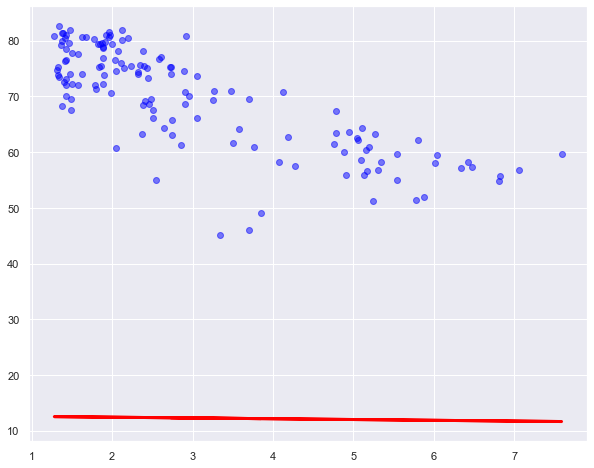

In [107]:
# Plot the fitted line on top of the scatter plot
plt.scatter(x_reshaped,y_reshaped,color="blue", alpha=0.5)
plt.plot(x_reshaped, y_pred, color="red", linewidth=3)
plt.show()